# Physical setup


In [1]:
r"""
In this section we describe how  to build a model of jet able to reproduce SSC/EC emission processes, using the :class:`.Jet` class from the :mod:`.jet_model` module. to This class through a flexible and intuitive interface allows to access the C numerical code that provides an accurate and fast computation of the synchrotron and inverse Compton processes.  
"""

'\nIn this section we describe how  to build a model of jet able to reproduce SSC/EC emission processes, using the :class:`.Jet` class from the :mod:`.jet_model` module. to This class through a flexible and intuitive interface allows to access the C numerical code that provides an accurate and fast computation of the synchrotron and inverse Compton processes.  \n'

## Basic  setup

In [1]:
from jetset.jet_model import Jet
my_jet=Jet(name='test',electron_distribution='lppl',)

In [2]:
Jet.available_electron_distributions()

lp: log-parabola
pl: powerlaw
lppl: log-parabola with low-energy powerlaw branch
lpep: log-parabola defined by peak energy
plc: powerlaw with cut-off
bkn: broken powerlaw
spitkov: spitkov
lppl_pile_up: log-parabola with low-energy powerlaw branch and pile-up
bkn_pile_up: broken powerlaw and pileup


to view all the paramters:

In [3]:
my_jet.show_pars()

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 2.000000e+00     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.000000e+06     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 1.000000e+02     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.000000e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 4.000000e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 1.000000e+04     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 5.000000e+15     1.000000e+03     1.000000e

In [4]:
my_jet.parameters.par_table

name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
str16,str19,object,float64,float64,float64,bool,bool
gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False
r,spectral_curvature,,4.000000e-01,-1.500000e+01,1.500000e+01,False,False
gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
B,magnetic_field,G,1.000000e-01,0.000000e+00,--,False,False


In [5]:
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: test  

electrons distribution:
 type: lppl  
 gamma energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-120

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ----------

## Setting the parameters

In [6]:
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=1E15)
my_jet.set_par('N',val=1E3)

In [7]:
my_jet.parameters.B.val=0.2
my_jet.parameters.r.val=0.4

## Investigating the electron distribution

In [8]:
my_jet.show_electron_distribution()

-------------------------------------------------------------------------------------------------------------------
electrons distribution:
 type: lppl  
 gamma energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
               B      magnetic_field               G 2.000000e-01     0.000000e+00               -- False  False
               N    emitters_density         1 / cm3 1.000000e+03     0.000000e+00               -- False  False
               R         region_size              cm 1.000000e+15     1.000000e+03     1.000000e+30 False  False
             R_H     region_position              cm 1.000000e+17     0.000000e+00               -- False   True
        beam_obj             beaming Lorentz

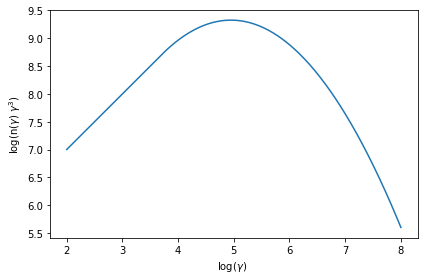

In [9]:
p=my_jet.electron_distribution.plot3p()

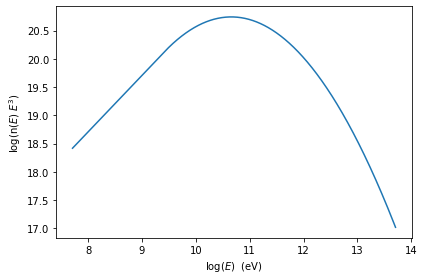

In [10]:
p=my_jet.electron_distribution.plot3p(energy_unit='eV')

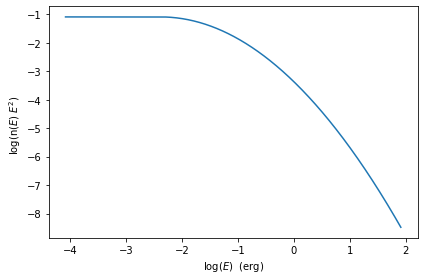

In [11]:
p=my_jet.electron_distribution.plot2p(energy_unit='erg')

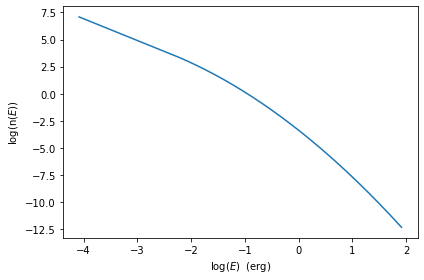

In [12]:
p=my_jet.electron_distribution.plot(energy_unit='erg')

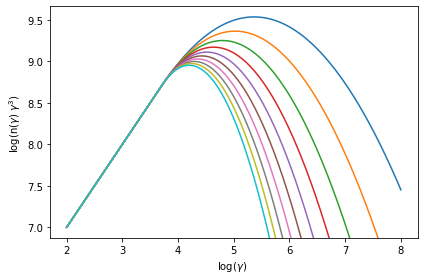

In [13]:
import numpy as np
p=None
for r in np.linspace(0.3,1,10):
    my_jet.parameters.r.val=r
    if p is None:
        p=my_jet.electron_distribution.plot3p()
    else:
        p=my_jet.electron_distribution.plot3p(p)

###  Using log values for electron distribution parameters

In [14]:
my_jet=Jet(name='test',electron_distribution='lppl',electron_distribution_log_values=True)
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: test  

electrons distribution:
 type: lppl  
 gamma energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  True

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-120

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- -----------

## Evaluate and plot  the model


At this point we can evaluate the  emission for this jet model using the instruction

In [15]:
my_jet.eval()

In [16]:
my_jet.show_pars()

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 3.010300e-01     0.000000e+00     9.000000e+00  True  False
            gmax high-energy-cut-off lorentz-factor* 6.000000e+00     0.000000e+00     1.500000e+01  True  False
               N    emitters_density         1 / cm3 1.000000e+02     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.000000e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 4.000000e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 4.000000e+00     0.000000e+00     9.000000e+00  True  False
               R         region_size              cm 5.000000e+15     1.000000e+03     1.000000e

and plot the corresponding SED:


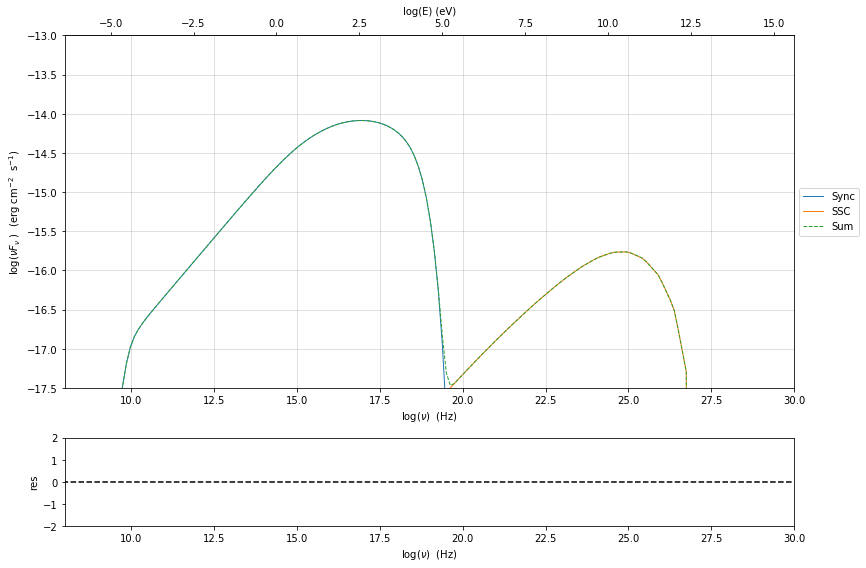

In [17]:
from jetset.plot_sedfit import PlotSED
my_plot=PlotSED()
my_jet.plot_model(plot_obj=my_plot)
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

alternatively, you can call the ``plot_model`` method without passing a ``Plot`` object

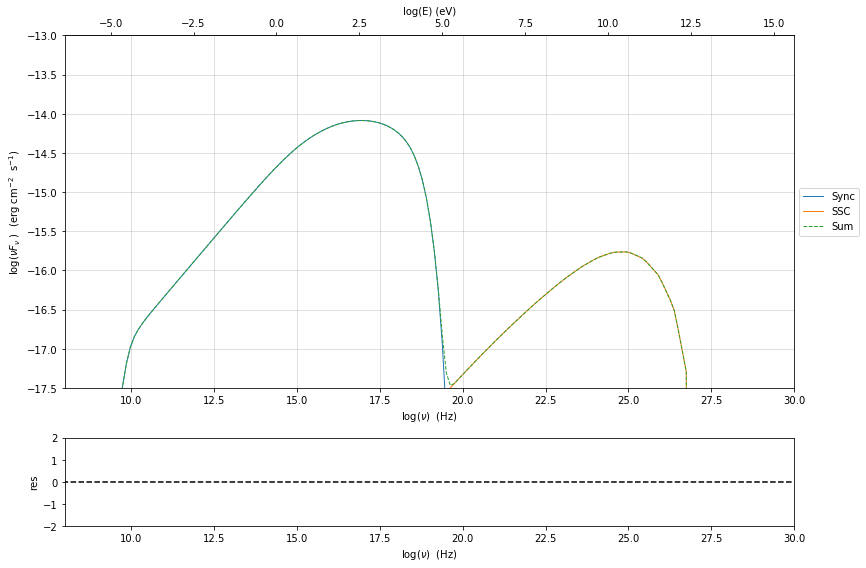

In [18]:
my_plot=my_jet.plot_model()
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

In [19]:
my_jet.set_IC_nu_size(100)

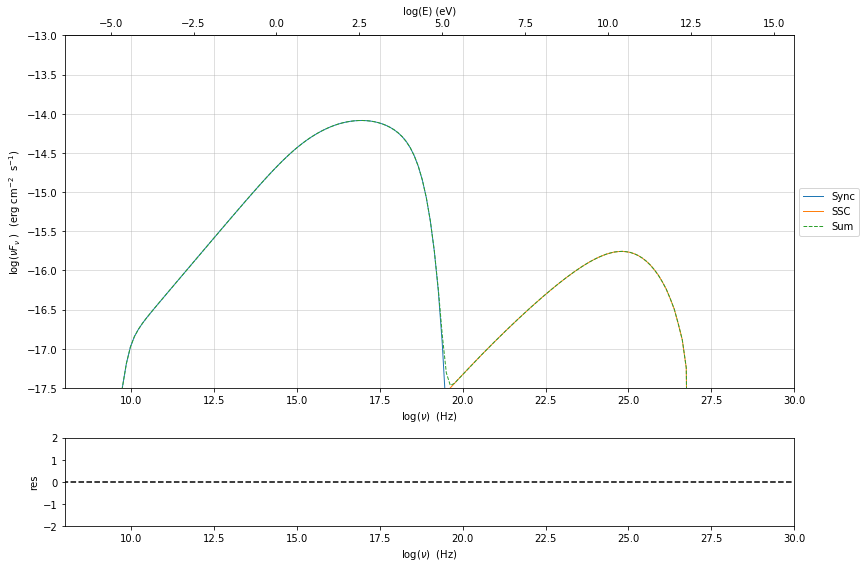

In [20]:
my_jet.eval()
my_plot=my_jet.plot_model()
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

you can access the same plot, but in the rest frame of the black hole, or accretion disk, hence plotting the isotropic luminosity,
by simply passing the ``frame`` kw to ``src``

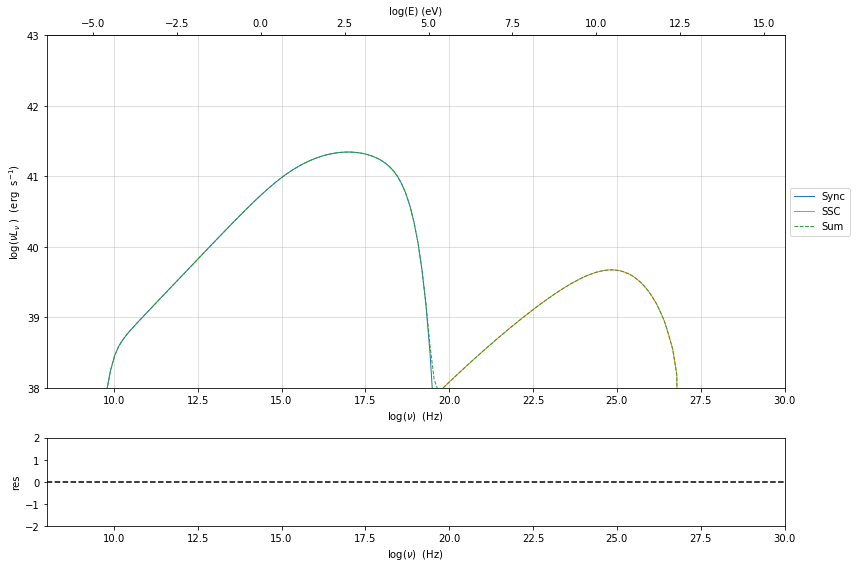

In [21]:
my_plot=my_jet.plot_model(frame='src')
my_plot.rescale(y_max=43,y_min=38,x_min=8)

the ``my_plot`` object returned will be built on the fly by the  ``plot_model`` method

## Comparing models on the same plot

to compare the same model after changing a parameter

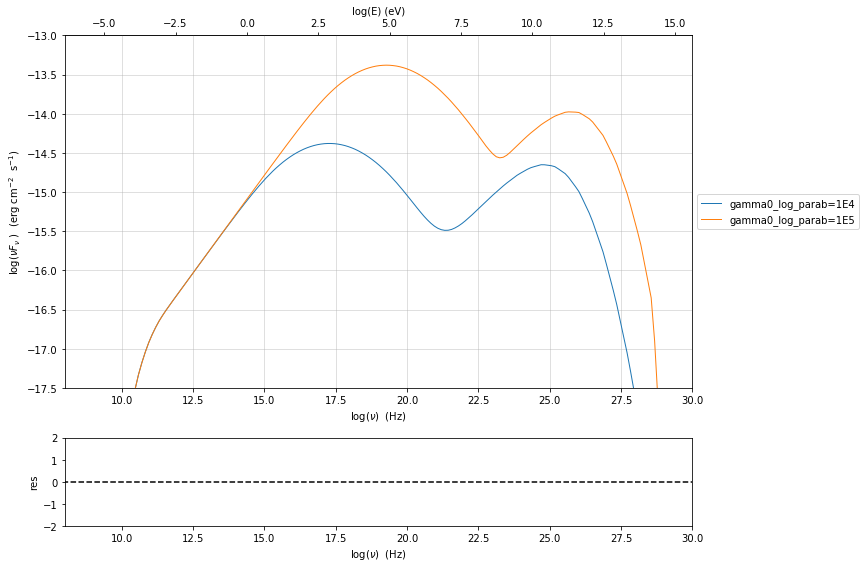

In [22]:
my_jet=Jet(name='test',electron_distribution='lppl',)
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=10**14.5)
my_jet.set_par('N',val=1E3)

my_jet.parameters.gamma0_log_parab.val=1E4
my_jet.eval()
my_plot=my_jet.plot_model(label='gamma0_log_parab=1E4',comp='Sum')
my_jet.set_par('gamma0_log_parab',val=1.0E5)
my_jet.eval()
my_plot=my_jet.plot_model(my_plot,label='gamma0_log_parab=1E5',comp='Sum')
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

## Saving a plot

to save the plot

In [23]:
my_plot.save('jet1.png')

## Saving and loading  a model

In [24]:
my_jet.save_model('test_model.pkl')

In [25]:
my_jet_new=Jet.load_model('test_model.pkl')

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 1.000000e+02     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.000000e+08     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 1.000000e+03     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.000000e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 4.000000e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 1.000000e+05     1.000000e+00     1.000000e+09 False  False
          L_Disk                Disk         erg / s 1.000000e+45     0.000000e+00              

## Switching on/off the particle distribution normalization

In [26]:
my_jet.Norm_distr

1

and then you can switch off the normalization withe command

In [27]:
my_jet.switch_Norm_distr_OFF()

OR

In [28]:
my_jet.Norm_distr=0

In [29]:
my_jet.switch_Norm_distr_ON()

OR

In [30]:
my_jet.Norm_distr=1

## Setting the particle density  from observed Fluxes or Luminosities

In [31]:
my_jet=Jet(name='test',electron_distribution='lppl')

this is the initial value of N

In [32]:
my_jet.parameters.N.val

100.0

In [33]:

my_jet.set_N_from_nuFnu(nuFnu_obs=1E-14,nu_obs=1E15)

This is the updated value of ``N``, obtained in order to match the given flux at the given frequency

In [34]:
my_jet.get_par_by_name('N').val

271.77338679726074

OR

In [35]:
my_jet.parameters.N.val

271.77338679726074

In [36]:
my_jet.parameters.show_pars()

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 2.000000e+00     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.000000e+06     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 2.717734e+02     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.000000e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 4.000000e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 1.000000e+04     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 5.000000e+15     1.000000e+03     1.000000e

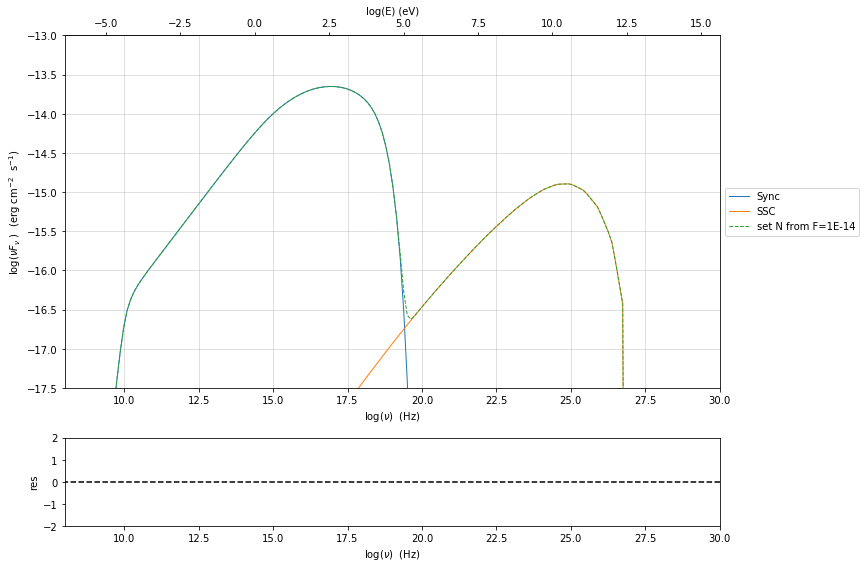

In [37]:
my_jet.eval()
my_plot=my_jet.plot_model(label='set N from F=1E-14')
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

In [38]:
my_jet.set_N_from_nuLnu(nuLnu_src=1E43,nu_src=1E15)

## Setting the beaming factor and expression

In [39]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')

In [40]:
my_jet.parameters.show_pars()

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 2.000000e+00     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.000000e+06     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 1.000000e+02     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.000000e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 4.000000e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 1.000000e+04     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 5.000000e+15     1.000000e+03     1.000000e

In [41]:
my_jet.get_beaming()

19.943844732554165

In [42]:
my_jet.set_par('theta',val=10.)

In [43]:
my_jet.get_beaming()

4.968041140891955

of course setting `beaming_expr=delta` we get the same beaming expression as in the default case

In [44]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='delta')

In [45]:
my_jet.parameters.show_pars()

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 2.000000e+00     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.000000e+06     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 1.000000e+02     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.000000e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 4.000000e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 1.000000e+04     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 5.000000e+15     1.000000e+03     1.000000e

## Switch ON/OFF Synchrotron sefl-absorption and IC emission

In [46]:
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: test  

electrons distribution:
 type: lppl  
 gamma energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-120

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ----------

as you see the state of Sync emission is `self-abs`, we can check accessing the specific spectral component state, and get the allowed states value

In [47]:
my_jet.spectral_components.Sync.show()

name     : Sync
var name : do_Sync
state    : self-abs
allowed states : ['on', 'off', 'self-abs']


In [48]:
my_jet.spectral_components.Sync.state='on'

now the sate is 'on' with no 'self-abs' 

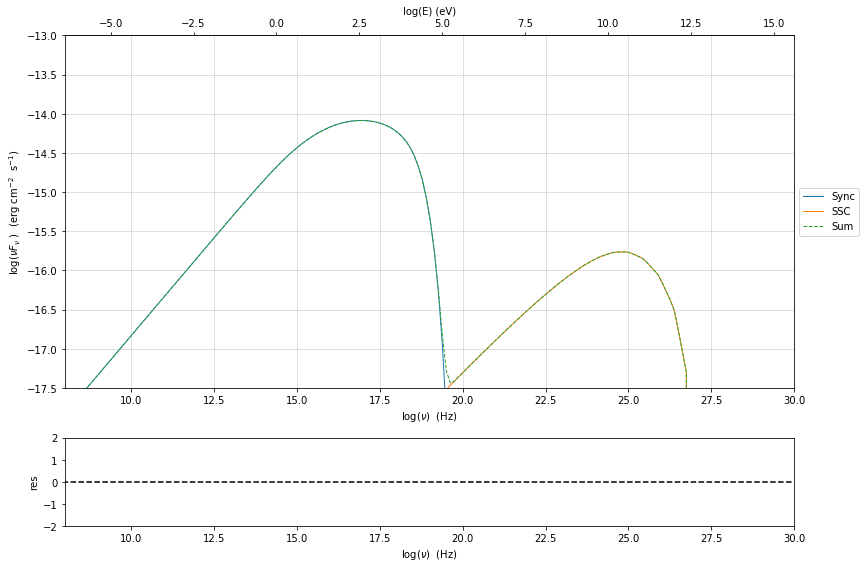

In [49]:
my_jet.eval()
p=my_jet.plot_model()
p.rescale(y_max=-13,y_min=-17.5,x_min=8)

to re-enable

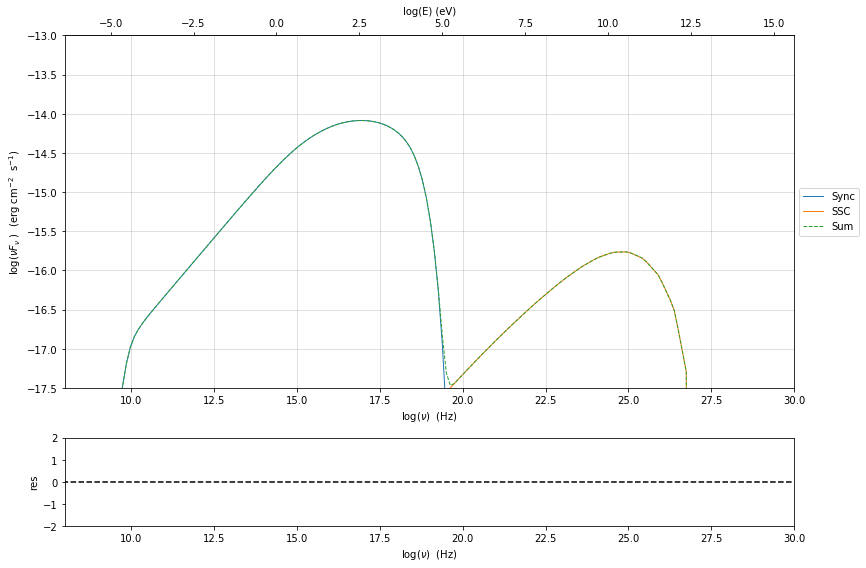

In [50]:
my_jet.spectral_components.Sync.state='self-abs'
my_jet.eval()
p=my_jet.plot_model()
p.rescale(y_max=-13,y_min=-17.5,x_min=8)

In [51]:
my_jet.spectral_components.SSC.show()

name     : SSC
var name : do_SSC
state    : on
allowed states : ['on', 'off']


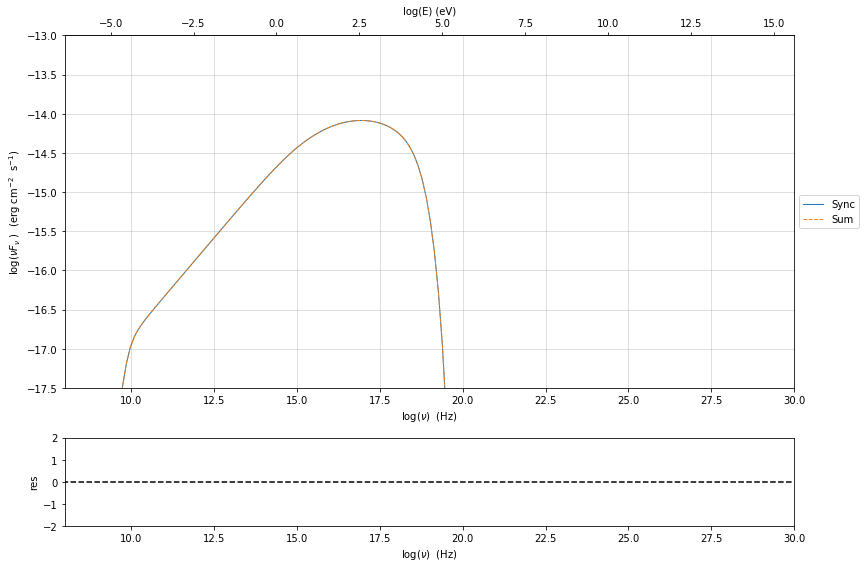

In [52]:
my_jet.spectral_components.SSC.state='off'
my_jet.eval()
p=my_jet.plot_model()
p.rescale(y_max=-13,y_min=-17.5,x_min=8)

to re-enable

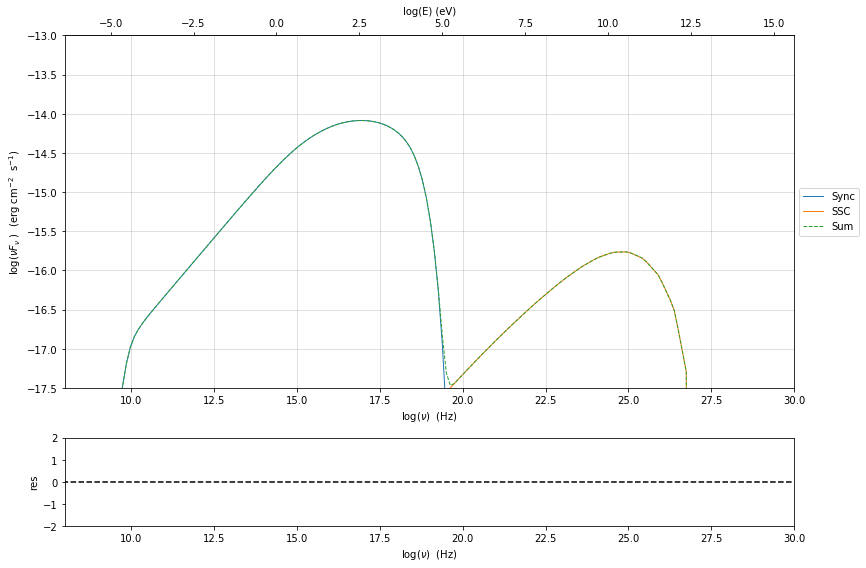

In [53]:
my_jet.spectral_components.SSC.state='on'
my_jet.eval()
p=my_jet.plot_model()
p.rescale(y_max=-13,y_min=-17.5,x_min=8)

## Accessing individual spectral components

It is possible to access specific spectral components of our model

In [54]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')
my_jet.eval()

In [55]:

my_jet.list_spectral_components()

Sum
Sync
SSC


the on-screen message is telling us which components have been evaluated. 

In [56]:
Sync=my_jet.get_spectral_component_by_name('Sync')

OR

In [57]:
Sync=my_jet.spectral_components.Sync

and from the ``SED`` object we can extract both the nu and nuFnu array

In [58]:
nu_sync=Sync.SED.nu
nuFnu_sync=Sync.SED.nuFnu

In [59]:
print (nuFnu_sync[::10])

[1.00000000e-120 5.57619143e-116 1.19513550e-022 1.98653126e-018
 4.19702144e-016 1.69462016e-015 6.75783575e-015 2.57876150e-014
 7.52686486e-014 1.25457799e-013 1.08986752e-013 9.77921122e-015
 6.56770273e-031 1.00000000e-120 1.00000000e-120 1.00000000e-120
 1.00000000e-120 1.00000000e-120 1.00000000e-120 1.00000000e-120] erg / (cm2 s)


In [60]:
nu_sync_src=Sync.SED.nu_src
nuLnu_sync_src=Sync.SED.nuLnu_src

In [61]:
print (nuLnu_sync_src[::10])

[2.70118406e-65 1.50623194e-60 3.22828095e+33 5.36598657e+37
 1.13369274e+40 4.57748096e+40 1.82541582e+41 6.96570944e+41
 2.03314474e+42 3.38884607e+42 2.94393276e+42 2.64154494e+41
 1.77405739e+25 2.70118406e-65 2.70118406e-65 2.70118406e-65
 2.70118406e-65 2.70118406e-65 2.70118406e-65 2.70118406e-65] erg / s


In [62]:
my_jet.spectral_components.build_table(restframe='obs')
t_obs=my_jet.spectral_components.table

In [63]:
t_obs[::10]

nu,Sum,Sync,SSC
Hz,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s)
float64,float64,float64,float64
1000000.0,1e-120,1e-120,1e-120
16070528.182616385,5.576191428817383e-116,5.576191428817383e-116,1e-120
258261876.06826746,1.195135512002044e-22,1.1951354961298763e-22,1.58672802592028e-30
4150404757.8504725,1.9865312839076317e-18,1.986531260738741e-18,2.3166636103266375e-26
66699196630.30115,4.197021843444382e-16,4.1970214417308514e-16,3.9801221901792325e-23
1071891319205.1265,1.6946213586281682e-15,1.6946201606592805e-15,1.1971272728883229e-21
17225859653987.84,6.757845256991403e-15,6.757835752672071e-15,9.5015570094613e-21
276828663039206.1,2.578767194222354e-14,2.578761495869709e-14,5.697083473691172e-20


In [64]:
my_jet.spectral_components.build_table(restframe='src')
t_src=my_jet.spectral_components.table

In [65]:
t_src[::10]

nu,Sum,Sync,SSC
Hz,erg / s,erg / s,erg / s
float64,float64,float64,float64
1100000.0,2.7011840560827467e-65,2.7011840560827467e-65,2.7011840560827467e-65
17677581.000878025,1.5062319381186786e-60,1.5062319381186786e-60,2.7011840560827467e-65
284088063.67509425,3.2282809898782117e+33,3.228280947004565e+33,4.286044444955511e+25
4565445233.63552,5.365986631000883e+37,5.365986568417445e+37,6.257734807521406e+29
73369116293.33127,1.1336928486542983e+40,1.1336927401440799e+40,1.0751042601373284e+33
1179080451125.6392,4.577484195023691e+40,4.577480959089232e+40,3.233661102627757e+34
18948445619386.625,1.825418386165959e+41,1.8254158188743746e+41,2.5665454301918126e+35
304511529343126.75,6.9657248293826625e+41,6.965709437083352e+41,1.5388871045307105e+36


Of cousrse, since these colums have units, you can easily convert the units of the Synchrotron luminostity form erg/s to GeV/s

In [66]:
t_src['Sync'][::10].to('GeV/s')

<Quantity [1.68594648e-62, 9.40116031e-58, 2.01493448e+36, 3.34918539e+40,
           7.07595353e+42, 2.85703889e+43, 1.13933494e+44, 4.34765387e+44,
           1.26898913e+45, 2.11515135e+45, 1.83745830e+45, 1.64872267e+44,
           1.10727953e+28, 1.68594648e-62, 1.68594648e-62, 1.68594648e-62,
           1.68594648e-62, 1.68594648e-62, 1.68594648e-62, 1.68594648e-62] GeV / s>

the table can be easily saved as an ascii file

In [67]:
t_src.write('test_SED.txt',format='ascii.ecsv',overwrite='True')

or in fits format

In [68]:
t_src.write('test_SED.fits',format='fits',overwrite='True')

## Energetic report

It is possible to get an energetic report of the jet model (updated each time that you evaluate the model).
This report gives energy densities (`U_`) (both in the blob end disk restframe), the luminosities of the emitted
components in the blob restframe (`L_`), and the luminosity carried by the jet (`jet_L`) for the radiative 
components, the electrons, the magnetic fields, and for the cold protons in the jet.

In [69]:
my_jet.energetic_report()

-----------------------------------------------------------------------------------------
jet eneregetic report:
     name                   type               units       val     
-------------- ----------------------------- --------- ------------
           U_e Energy dens. blob rest. frame erg / cm3 1.740434e-03
      U_p_cold Energy dens. blob rest. frame erg / cm3 1.503276e-02
           U_B Energy dens. blob rest. frame erg / cm3 3.978874e-04
           U_p Energy dens. blob rest. frame erg / cm3 0.000000e+00
    U_p_target Energy dens. blob rest. frame erg / cm3 0.000000e+00
       U_Synch Energy dens. blob rest. frame erg / cm3 5.506770e-05
   U_Synch_DRF Energy dens. disk rest. frame erg / cm3 8.712292e+00
        U_Disk Energy dens. blob rest. frame erg / cm3 0.000000e+00
         U_BLR Energy dens. blob rest. frame erg / cm3 0.000000e+00
          U_DT Energy dens. blob rest. frame erg / cm3 0.000000e+00
         U_CMB Energy dens. blob rest. frame erg / cm3 0.000000e+00
   

If you want to evaluate the energetic report in non verbose mode:

In [70]:
my_jet.energetic_report(verbose=False)

In [71]:
my_jet.energetic_dict

{'U_e': 0.0017404342430246782,
 'U_p_cold': 0.015032764261000002,
 'U_B': 0.00039788735772973844,
 'U_p': 0.0,
 'U_p_target': 0.0,
 'U_Synch': 5.506769532122052e-05,
 'U_Synch_DRF': 8.712292317747346,
 'U_Disk': 0.0,
 'U_BLR': 0.0,
 'U_DT': 0.0,
 'U_CMB': 0.0,
 'U_Disk_DRF': 0.0,
 'U_BLR_DRF': 0.0,
 'U_DT_DRF': 0.0,
 'U_CMB_DRF': 0.0,
 'L_Sync_rf': 1.728764352592126e+38,
 'L_SSC_rf': 3.82887909757934e+36,
 'L_EC_Disk_rf': 0.0,
 'L_EC_BLR_rf': 0.0,
 'L_EC_DT_rf': 0.0,
 'L_EC_CMB_rf': 0.0,
 'L_pp_gamma_rf': 0.0,
 'jet_L_Sync': 4.3219108814803147e+39,
 'jet_L_SSC': 9.572197743948349e+37,
 'jet_L_EC_Disk': 0.0,
 'jet_L_EC_BLR': 0.0,
 'jet_L_EC_DT': 0.0,
 'jet_L_EC_CMB': 0.0,
 'jet_L_pp_gamma': 0.0,
 'jet_L_rad': 4.417632858919798e+39,
 'jet_L_kin': 4.043042849486076e+42,
 'jet_L_tot': 4.0474604823449956e+42,
 'jet_L_e': 4.097964612089291e+41,
 'jet_L_B': 9.368514312500004e+40,
 'jet_L_p_cold': 3.5395612451521466e+42,
 'jet_L_p': 0.0}

In [72]:
my_jet.energetic_report_table

name,type,units,val
str14,str29,object,float64
U_e,Energy dens. blob rest. frame,erg / cm3,1.740434e-03
U_p_cold,Energy dens. blob rest. frame,erg / cm3,1.503276e-02
U_B,Energy dens. blob rest. frame,erg / cm3,3.978874e-04
U_p,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_p_target,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_Synch,Energy dens. blob rest. frame,erg / cm3,5.506770e-05
U_Synch_DRF,Energy dens. disk rest. frame,erg / cm3,8.712292e+00
U_Disk,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_BLR,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
